In [2]:
! pip install sidetable -U


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 1.1 MB/s eta 0:00:01


we are working on an online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales .
our goal is to identify patterns that determine whether a **game succeeds or not**. 
To spot potential big winners and plan advertising campaigns.
We have data going back to 2016. we’re planning a campaign for 2017.
 we're forecasting 2017 sales based on data from 2016.
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.
we are going to:
1. prepare the data (preprocessing)

   *missing values
   
   *errors
   
   *duplicates
   
   *changing data types
   
   
2. EDA and visualization
3. SDA and hypothesis
4. conclusion

# Open the data file and study the general information

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math 
import numpy as np 
from scipy import stats 
from scipy.stats import mannwhitneyu
import seaborn as sns
import sidetable 


/opt/conda/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
try :
    data = pd.read_csv('/datasets/games.csv')

except :
    print('data is not there')
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
data.rename(columns=str.lower,inplace=True)

our data contain 11 columns and 16715 entry 

we had information about the name,platform,year_of_released,genre,sales in US,EU,JP and other regions ,we have information about professional and user score and finally the rating for each game .


In [6]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

we have 2 missing values in the game name so we can drop them the rate is less than 5%


In [7]:
rate = (data['name'].isnull().sum() / len(data) )
print('the rate of the name missing values equals to {:.2%}'.format(rate))

the rate of the name missing values equals to 0.01%


In [8]:
data['name']=data['name'].dropna(axis=0)
data['name'].isnull().sum()

2

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
rate = (data['genre'].isnull().sum() / len(data) )
print('the rate of the genre missing values equals to {:.2%}'.format(rate))
data['genre'].reset_index(drop=True,inplace=True)
data['genre'].isnull().sum()

the rate of the genre missing values equals to 0.01%


2

In [11]:
# i am not going to drop the year of relaesing because it's not important for anlyzing 
rate = (data['year_of_release'].isnull().sum() / len(data) )
print('the rate of the genre missing values equals to {:.2%}'.format(rate))
data['year_of_release'].dropna(axis=0,inplace=True)
data['year_of_release'].isnull().sum()

the rate of the genre missing values equals to 1.61%


269

In [12]:

rate = (data['critic_score'].isnull().sum() / len(data) )
if ((rate*100) > 10):
    print(' we cannot drop the entries because the rate of the critic_score missing calues equals to {:.2%}'.format(rate))
else:
    print(' we are going to drop the entries')


 we cannot drop the entries because the rate of the critic_score missing calues equals to 51.32%


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [14]:
data['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: critic_score, Length: 82, dtype: int64

In [15]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


it doesn't seem that we have error in the data EXCEPT in the year we need to change the data


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [17]:
rate = (data['user_score'].isnull().sum() / len(data) )
if ((rate*100) > 10):
    print(' we cannot drop the entries because the rate of the critic_score missing calues equals to {:.2%}'.format(rate))
else:
    print(' we are going to drop the entries')

 we cannot drop the entries because the rate of the critic_score missing calues equals to 40.09%


In [18]:
data['year_of_release'] = data['year_of_release'].fillna(data.groupby('name')['year_of_release'].apply(lambda group: group.ffill()))
data['year_of_release'].isnull().sum()
#data['year_of_release'] = data['year_of_release'].transform()

189

there was 269 missing values we replace some of them by the name of game the remaing 189 of missied values in the year_of_release we can drop the rest 

In [19]:
data['year_of_release'].fillna(data["year_of_release"].min(),inplace=True)
data['year_of_release'].isnull().sum()

0

In [20]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
#list_col=list(data)
#list_col.remove(['name','year_of_release']ֻ
            
data['total_sales']=data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis=1)
#+data[]+data['jp_sales']+data['other_sales']
data['total_sales']

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: total_sales, Length: 16715, dtype: float64

Text(0.5, 1.0, 'the total sales distribution for each game')

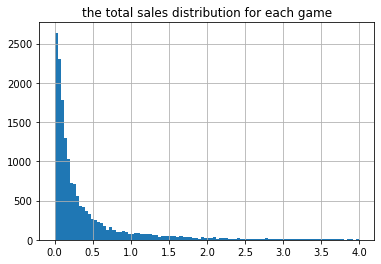

In [22]:
data['total_sales'].hist(bins=100,range=(0,4))
plt.title('the total sales distribution for each game')

critic score user_score and rating has a high percentage in missing value and it doesn't depend on any other values and we cannot estimate the values 

# plot of missing values

Text(0, 0.5, 'number of missing values')

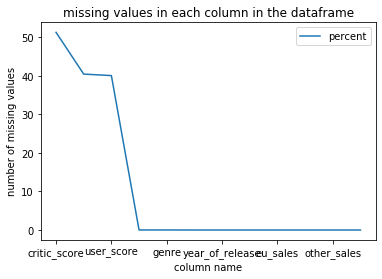

In [23]:
missing_values=data.stb.missing().reset_index()
missing_values.plot(x='index'
                    ,y='percent')
plt.title('missing values in each column in the dataframe')
plt.xlabel('column name')
plt.ylabel('number of missing values')

In [24]:
data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6416,Gallop Racer 2: One and Only Road to Victory,PS,1997.0,Sports,0.00,0.00,0.25,0.02,NaN,NaN,NaN,0.27
3956,Chopper Command,2600,1982.0,Shooter,0.47,0.03,0.00,0.01,NaN,NaN,NaN,0.51
14702,Star Trek: The Game,PC,2013.0,Action,0.00,0.02,0.00,0.00,NaN,NaN,NaN,0.02
7547,Deal or No Deal: The Banker is Back!,DS,2008.0,Misc,0.00,0.20,0.00,0.00,NaN,NaN,NaN,0.20
13206,Hotel for Dogs,Wii,2009.0,Simulation,0.04,0.00,0.00,0.00,NaN,tbd,E,0.04
3565,"Monsters, Inc. Scream Team",PS,2001.0,Platform,0.31,0.21,0.00,0.04,65.0,6.9,E,0.56
5135,Virtua Tennis 2009,Wii,2009.0,Sports,0.12,0.21,0.00,0.04,73.0,7.7,E,0.37
11404,Pimp My Ride: Street Racing,PS2,2009.0,Racing,0.04,0.03,0.00,0.01,NaN,NaN,NaN,0.08
11295,Raiden Fighters Aces,X360,2008.0,Shooter,0.06,0.02,0.00,0.01,73.0,7.5,E10+,0.09
2687,Bayonetta 2,WiiU,2014.0,Action,0.32,0.28,0.10,0.06,91.0,8.2,M,0.76


# describe() of type object

In [25]:
data.describe(include='object')

,name,platform,genre,user_score,rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


# top five sales in north america

In [26]:
#top five sale in north america
data.nlargest(5,['na_sales'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52


In [27]:
data= data.drop(data[data['genre'].isnull()].index)

In [28]:
data.isnull().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
total_sales           0
dtype: int64

the missing value in genre are the same as name and it's percent 0.01 so we drop them 

# explain the high missing values in the dataset

**Rating** maybe the player didn't like the game so he didn't feel to  be motivated to rate it  

**critic score** game critics are giving feedback, the wider sample of opinions there are available for future game developers.Metacritic only accepts the first review and first score published for a given game by a given publication.so maybe the game is not intresting enought to make the critics play it and score it or maybe the game developers doesn't want their games to be reviewed.

**user score**
may be the game didn't attract the gamer(user) to score .

# changing data types

In [29]:
data.dtypes


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
total_sales        float64
dtype: object

In [30]:
#data['year_of_release'] = data['year_of_release'].astype(int)
data['genre']=data['genre'].astype('category')

In [31]:
data['year_of_release'] = data['year_of_release'].astype(int)
data['na_sales']= data['na_sales'].astype(int)
data['eu_sales'] = data['eu_sales'].astype(int)
data['other_sales'] = data['other_sales'].astype(int)
data['jp_sales '] = data['jp_sales'].astype(int)
data['total_sales'] = data['total_sales'].astype(int)


replacing rating nan values with unknown

In [32]:
data['rating']=data['rating'].fillna(value='unknown')
data['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

# conclusion

we have three columns with a huge missed values which are the critic ,user score and the rating almost half of the data is missed so we couldn't drop them 

we drop the missed values that it's rate less that 10% and cannot be replaced based on other values

we have changed data types which suitable with the data in each column 

There is no error in the data all the values seemed to be logic except in the user_score we have tbd score we deal with it in the analyze chapter 

In [33]:
data['user_score']=data['user_score'].replace(to_replace='tbd' , value=None)

# Analyze the data

Look at how many games were released in different years. Is the data for every period significant?

Text(0, 0.5, 'frequency')

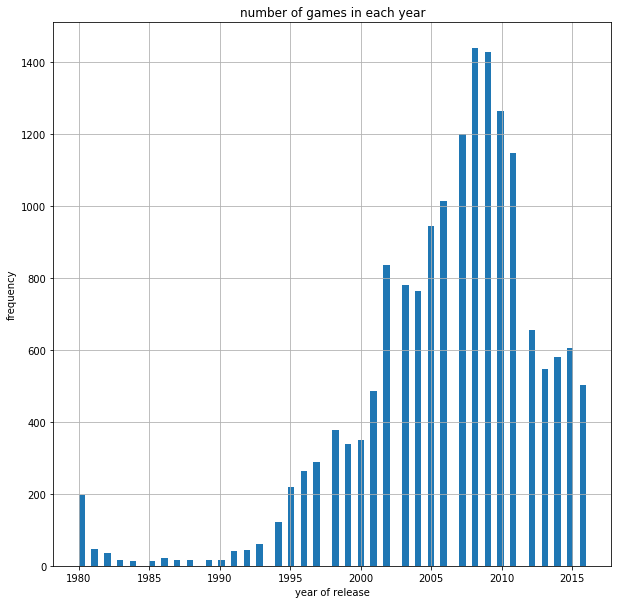

In [34]:
data['year_of_release'].hist(figsize=(10,10),bins=80)
plt.title('number of games in each year')
plt.xlabel('year of release')
plt.ylabel('frequency')

According to the year game released we can notice that 1440 game have been released in 2008 ,2009,2010,2011,2006 although in 2006 there is 1014 but maybe they have been faded with the time we need to analyze more to see the relation between the year released how each game interact in the industry by how much it have been sold ?


Look at how sales varied from platform to platform.Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

[Text(0, 0.5, 'total sales'), Text(0.5, 0, 'platform')]

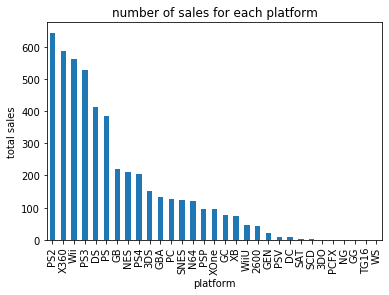

In [35]:
platform=data.pivot_table(index=['platform'],values='total_sales',aggfunc='sum').reset_index()
#platform = platform.set_index(['platform','year'])
platform.sort_values(by='total_sales',ascending=False,inplace=True)

platform.plot(x='platform',y='total_sales',kind='bar',title='number of sales for each platform',legend=False).set(xlabel='platform', ylabel='total sales')


i grouped the the data by platform and sorted them according to the total sales for eavh platform we can see that **PS2** has the greatest sales but that doesn't mean that it it kept it's selling until 2016 maybe the sales are just in one or two years then it stops 
however there's also X360 and PS3 Wii DS PS the have the greatest sales around (900-1000)

In [36]:
top10_platforms = (data
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)).head(10)
li=list(top10_platforms.index)
top10_platforms
li

['PS2', 'X360', 'Wii', 'PS3', 'DS', 'PS', 'GB', 'NES', 'PS4', '3DS']

in top10 platform we took the first 10 which have the gretest sales save them as a list in Li

In [37]:
 def display_group_density_plot(df, groupby, on, palette, figsize):
    """
    Displays a density plot by group, given a continuous variable, and a group to split the data by
    :param df: DataFrame to display data from
    :param groupby: Column name by which plots would be grouped (Categorical, maximum 10 categories)
    :param on: Column name of the different density plots
    :param palette: Color palette to use for drawing
    :param figsize: Figure size
    :return: matplotlib.axes._subplots.AxesSubplot object
    """

    if not groupby:
        raise ValueError('groupby parameter must be provided')

    elif not groupby in df.keys():
        raise ValueError(groupby + ' column does not exist in the given DataFrame')

    if not on:
        raise ValueError('on parameter must be provided')

    elif not on in df.keys():
        raise ValueError(on + ' column does not exist in the given DataFrame')

    if len(set(df[groupby])) > 10:
        groups = df[groupby].value_counts().index[:10]

    else:
        groups = set(df[groupby])

    # Get relevant palette
    if palette:
        palette = palette[:len(groups)]
    else:
        palette = sns.color_palette()[:len(groups)]

    # Plot
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    ax.legend(bbox_to_anchor=(1.04, 1), loc='upper left')

    for value, color in zip(groups, palette):
        sns.kdeplot(df.loc[df[groupby] == value][on], \
                    shade=True, color=color, label=value)

    ax.set_title(str("Distribution of " + on + " per " + groupby + " group"),\
                 fontsize=30)
    
    ax.set_xlabel(on, fontsize=20)
    return ax 

To see the distribution if the top 10 platform according to the years we made a function called display_group_density_plot to plot the platform and the year as x-axis and the toal sales as the y-axis as you can see below

No handles with labels found to put in legend.


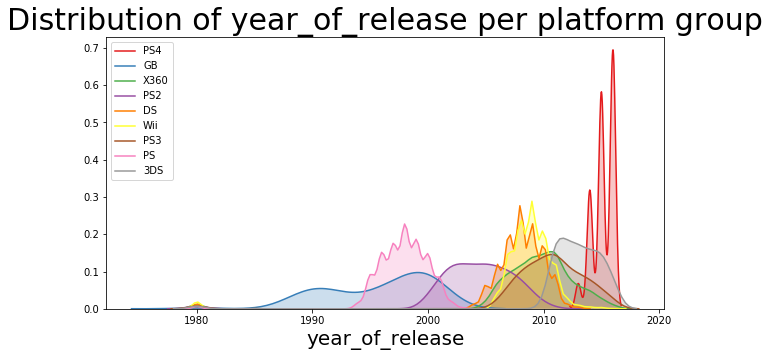

In [38]:
display_group_density_plot(data[data["platform"].isin(top10_platforms.index)], groupby = "platform", on = 'year_of_release', \
                                           palette = sns.color_palette('Set1'), 
                           figsize = (10, 5))

most of the platforms have been released in 2005 but start in sales to increse in 2006 and continued for about 8-10 years then new platforms appears while the old ones disappears for example PS platform have been released in 1994 but the noticable revenue start at 1995 in it last for about 9 years(2004) and the it disappear if  you can see that two platforms have been appear when the PS revenue starts to decrease after 5 years the GBA and PS2 appears at 2000 and last for about 7 (GBA) and 10 (PS2) and the same thing happen when its revenue starts getting down for both platforms plenty of platforms appeared again on the last years before the old platform disapears for about 2 years 
then if we took a look on the plenty platform they did appear in 2005 and last for about 8-10 years then the same happen here in the last two years before disappearing the PS4 have been appeared

from chart we can see that there is small amount of sales around 1980 and that make sense because in the past people wasn't caring about technology and gaming contrary to now games have imapct on everybody 
as we can notice PS GBA and PS2 realeased in an early period and faded before 2011 on the other hand plenty of platform have been released in 2005 and gain revenue till 2015 
the only paltform that makes a great revenue in the last years and continued to gain in 2016 was PS4
As a result i am going to consider the period with plenty of total sales but at the same time in the last years 
studing the data ten years before 

In [39]:
df = data

In [40]:
all_sales_per_platform =df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

In [41]:
platforms = list(all_sales_per_platform.index)

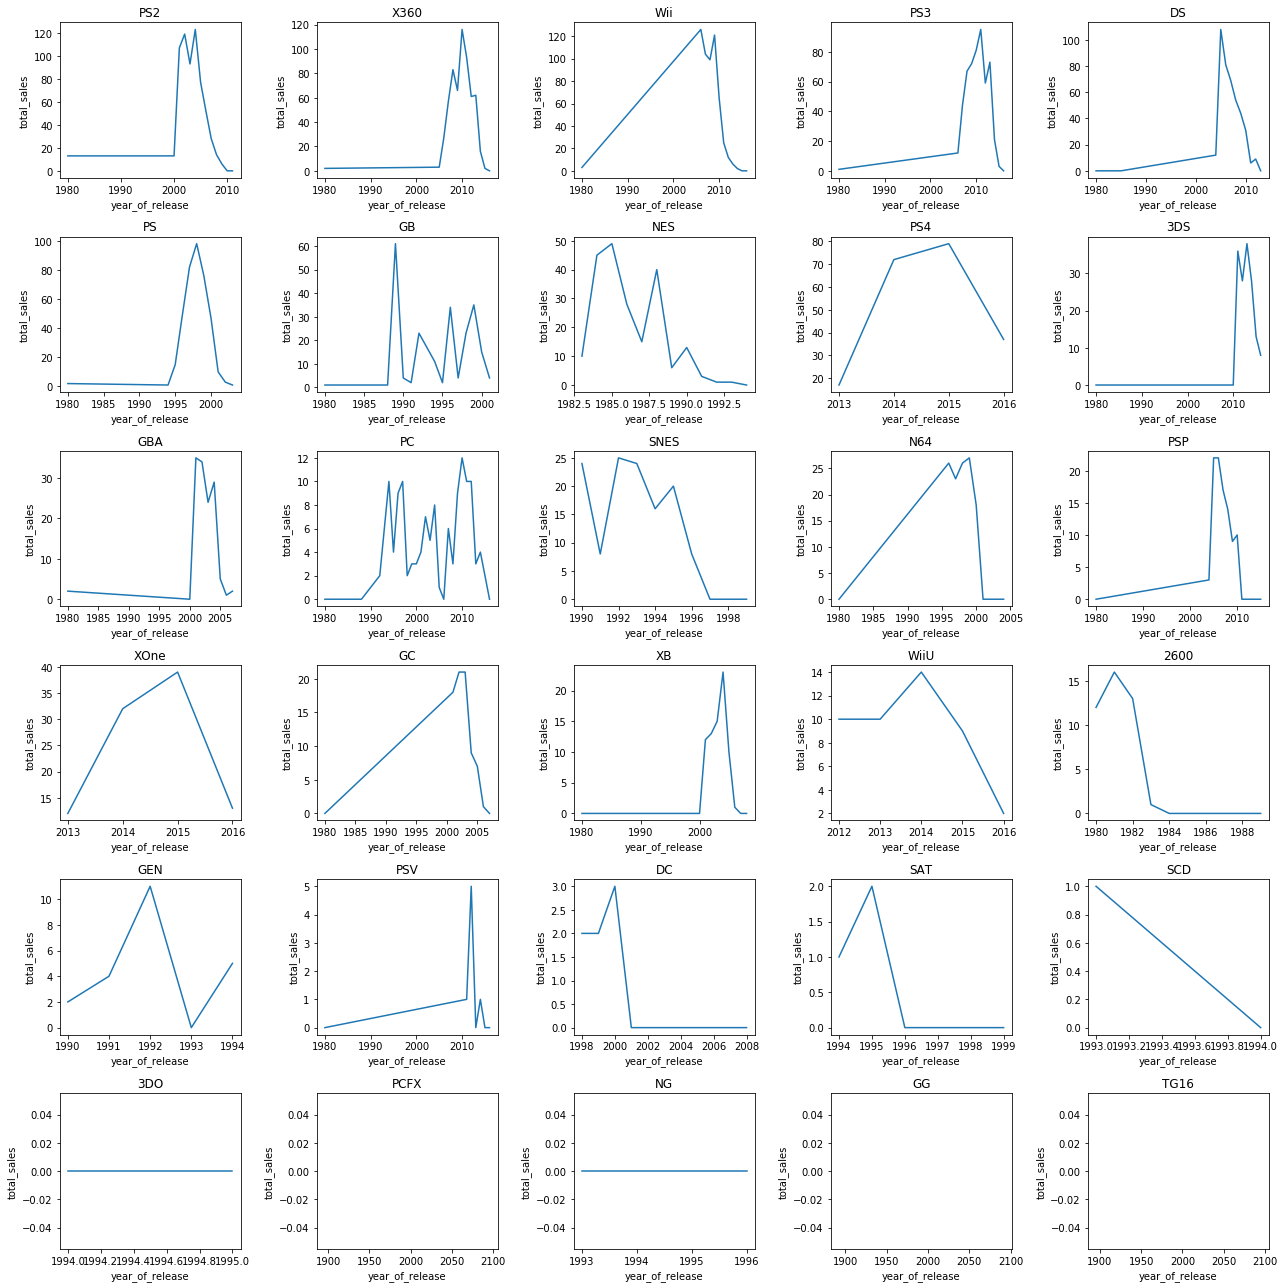

In [42]:
fig, axs = plt.subplots(6, len(platforms) // 6)
axs = axs.flatten()

num = 0
for platform, ax in zip(platforms, axs):
     ((df[df["platform"]==platform]
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False))['total_sales']
                .plot(ax=ax, figsize=(18, 18), title=platform,kind='line')
                .set(xlabel='year_of_release', ylabel='total_sales'))
   
    
plt.tight_layout()
plt.show()

'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC'
for all platforms total number of sales is being decreasing from 2014 to 2016

PS2
As we saw before that PS2 have the greatest sales but here we are studing if it sales continued over the years or if it is just for specific period of time as we can see the dark blue have started in 2000 and it ends in 2008 
has greatest total sales at the same time it faded at 2008 so it has no imapct on 2017 sales
X360 
 it sales peak at 2010 then it starts to decrease it sales until 2016

ps3 
 it sales peak at 2011 then it starts to decrease it sales until 2016
wii 
it sales peak at 2009 then it starts to decrease it sales until 2016 but from 2012 until 2016 its almost zero sales
ds
it starts 2007 and the year it release it gains a lot of revenue then after one year it sales starts to decrease until 2011 from 2011 -2013 its sales was almost zero and then it faded away then it sales peak at 2011 then it starts to decrease it sales until 2016

ps
to conclude up we can notice that the psp and ps2 and pc platforms starts at 2007 and ends in 2015 and 2011 except the pc it decrese it sales in 2016

In [43]:
data['year_of_release'].value_counts().head(15)

2008    1440
2009    1429
2010    1265
2007    1201
2011    1148
2006    1014
2005     944
2002     837
2003     780
2004     764
2012     655
2015     606
2014     582
2013     547
2016     502
Name: year_of_release, dtype: int64

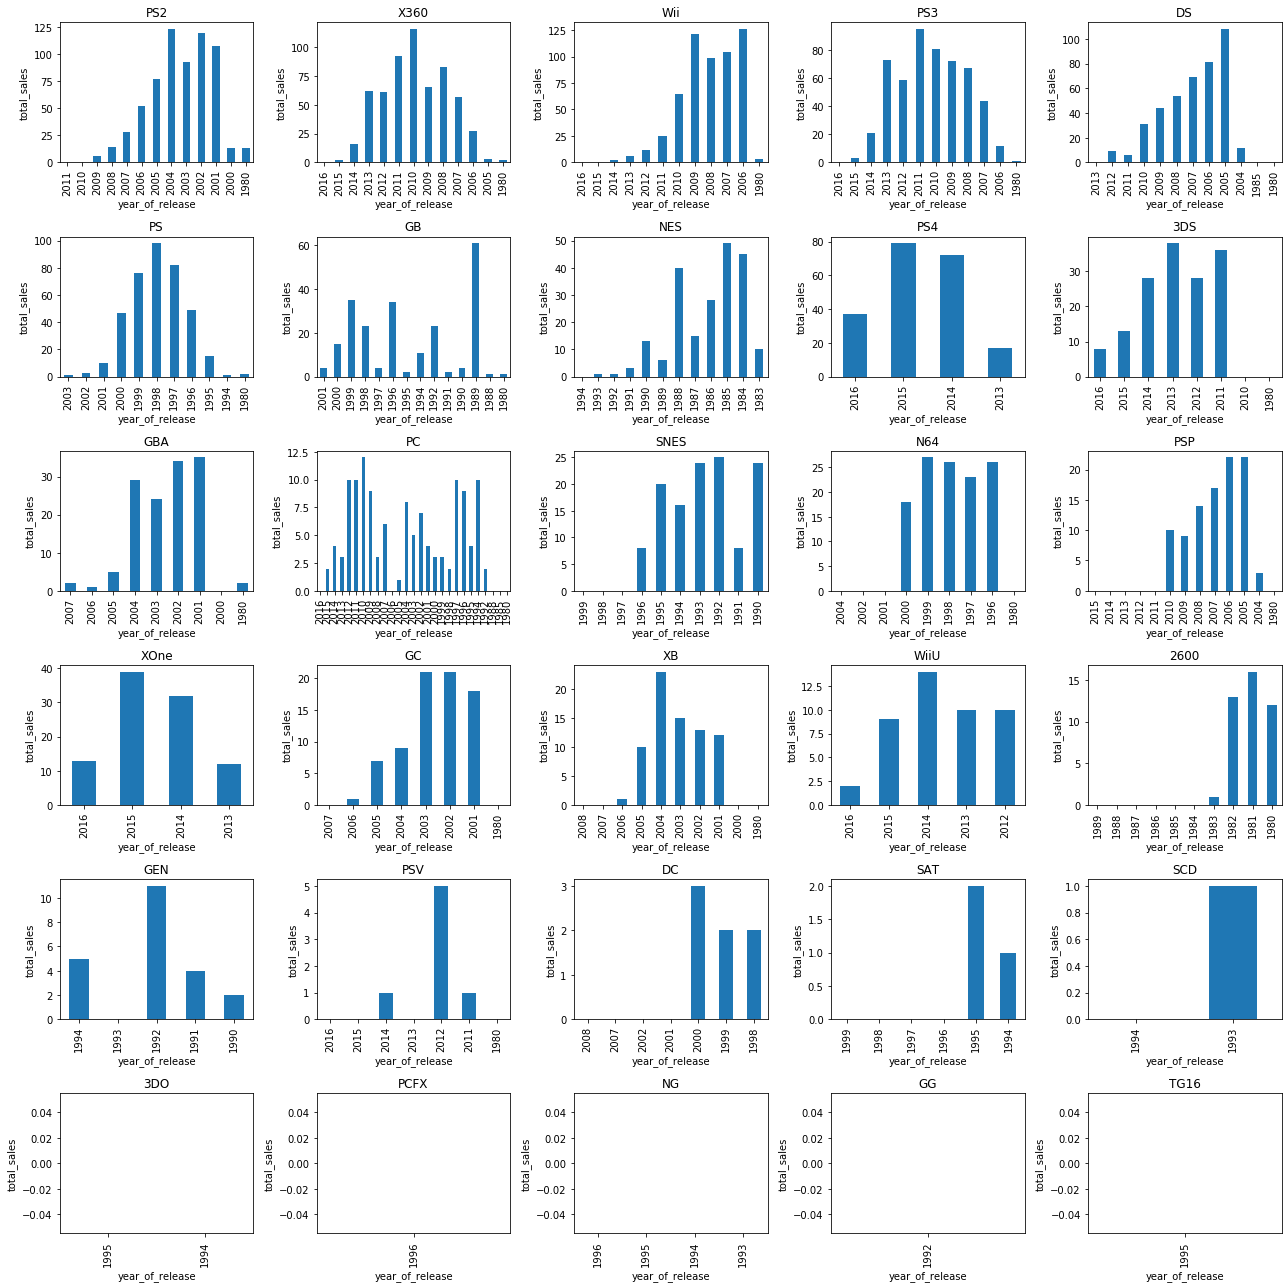

In [44]:
fig, axs = plt.subplots(6, len(platforms) // 6)
axs = axs.flatten()

num = 0
for platform, ax in zip(platforms, axs):
     ((df[df["platform"]==platform]
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False))['total_sales']
                .plot(ax=ax, figsize=(18, 18), title=platform,kind='bar')
                .set(xlabel='year_of_release', ylabel='total_sales'))
   
    
plt.tight_layout()
plt.show()

Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.

In [45]:
new=data.query('(year_of_release >= 2013)')
new

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,jp_sales
16,Grand Theft Auto V,PS3,2013,Action,7,9,0.98,3,97.0,8.2,M,21,0
23,Grand Theft Auto V,X360,2013,Action,9,5,0.06,1,97.0,8.1,M,16,0
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6,5,0.36,2,NaN,NaN,unknown,14,0
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5,4,4.35,0,NaN,NaN,unknown,14,4
42,Grand Theft Auto V,PS4,2014,Action,3,6,0.38,1,97.0,8.3,M,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0,0,0.01,0,NaN,NaN,unknown,0,0
16707,Aiyoku no Eustia,PSV,2014,Misc,0,0,0.01,0,NaN,NaN,unknown,0,0
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0,0,0.01,0,NaN,NaN,unknown,0,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0,0,0.01,0,NaN,NaN,unknown,0,0


Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.

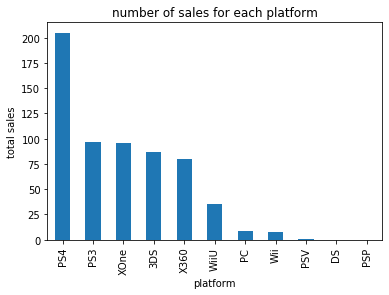

In [46]:
platform1=new.pivot_table(index=['platform'],values='total_sales',aggfunc='sum').reset_index()
#platform = platform.set_index(['platform','year'])
platform1.sort_values(by='total_sales',ascending=False,inplace=True)
#platforms = list(platform1.index)
#print(platforms)
#fig, ax = plt.subplots(1,2)


platform1.plot(x='platform',y='total_sales',kind='bar',title='number of sales for each platform',legend=False).set(xlabel='platform', ylabel='total sales')
plt.show()

from the figure above we can notice that PS2 sales have been decreased from the most profitable to lowest profitable platform  and XB,GC,DC almost have zero sales in addition PS4,3DS,PSP,PS2,PC,XONE,WiiU,PSV,and GBA their sales are less than 300


on other hand PS3 X360 Wii and,DS are making the most revenue > 550


we can see also that there are platforms have totally cease in the new chart like GEN ,SAT,GG,NG,2600,PCFX,3DO,TG16,Aand SCD

In [47]:
new_sales_per_platform =new.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)

In [48]:
new_platform = list(new_sales_per_platform.index)

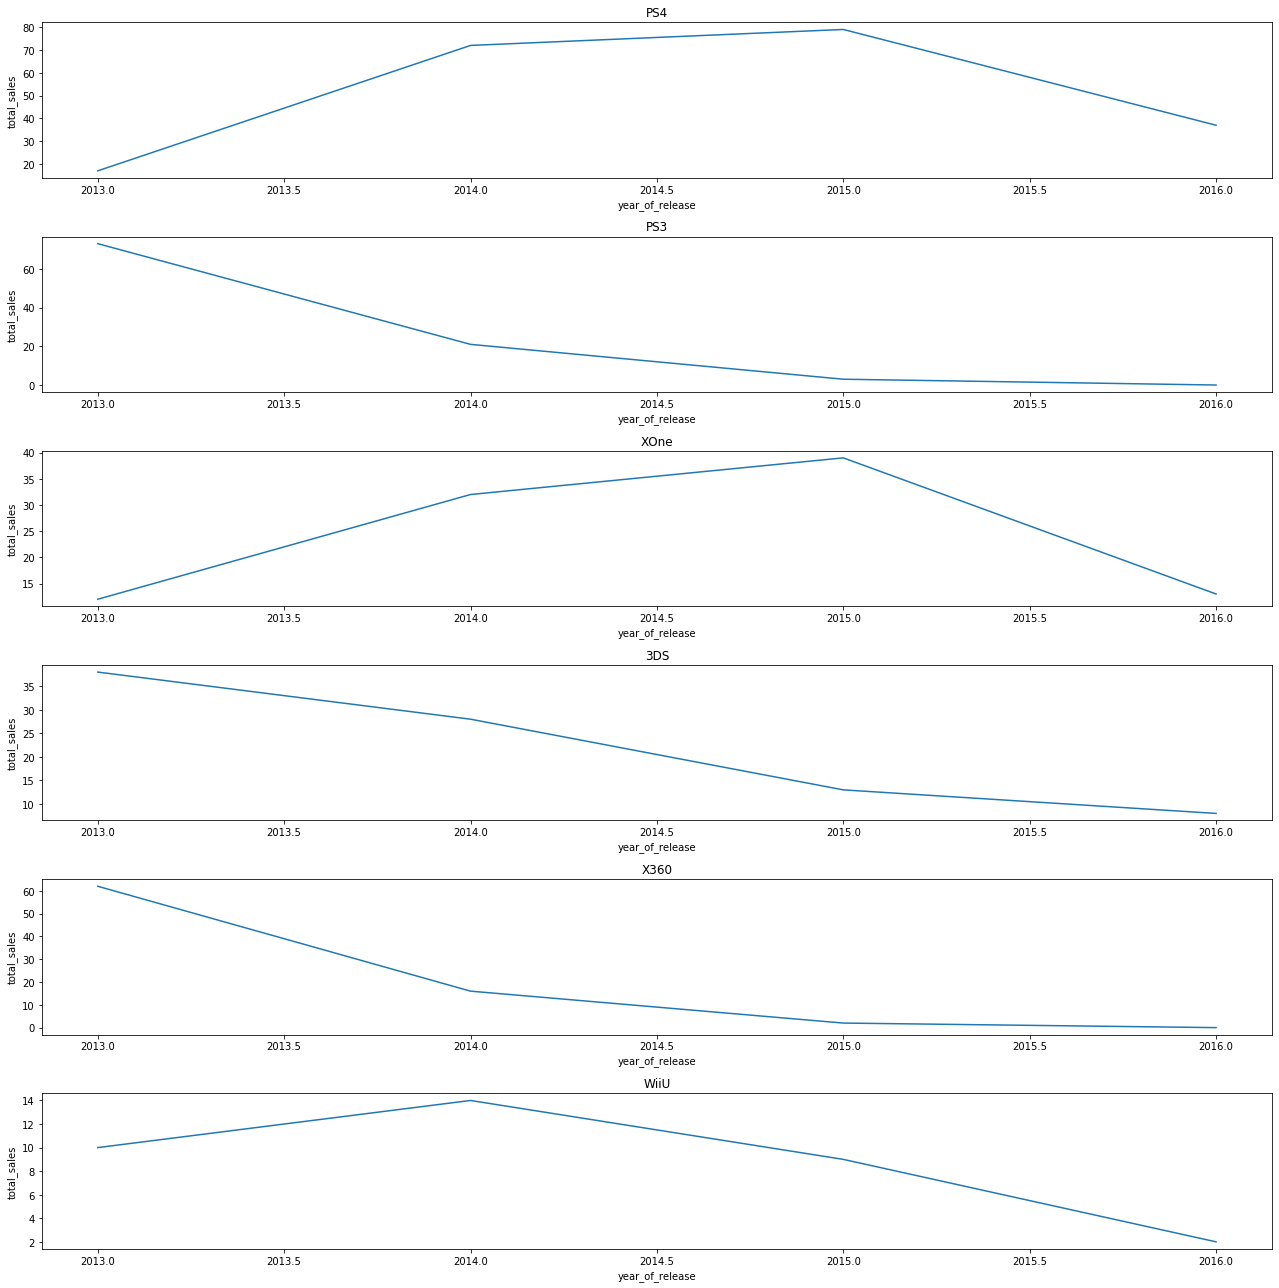

In [49]:
fig, axs = plt.subplots(6, len(new_platform) // 6)
axs = axs.flatten()

num = 0
for platform, ax in zip(new_platform, axs):
     ((new[new["platform"]==platform]
            .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
            .sort_values('year_of_release', ascending=False))['total_sales']
                .plot(ax=ax, figsize=(18, 18), title=platform,kind='line')
                .set(xlabel='year_of_release', ylabel='total_sales'))
   
    
plt.tight_layout()
plt.show()

In [50]:
x=new.pivot_table(index='platform',values='year_of_release',aggfunc=('max','min')).reset_index()
x['years_of_each_platform'] = x['max']-x['min']
x['max'].value_counts()
y=data.pivot_table(index='platform',values='year_of_release',aggfunc=('max','min')).reset_index()
y['years_of_each_platform'] = y['max']-y['min']
y['max'].value_counts()
z =x.merge(y,on='platform')
z

,platform,max_x,min_x,years_of_each_platform_x,max_y,min_y,years_of_each_platform_y
0,3DS,2016,2013,3,2016,1980,36
1,DS,2013,2013,0,2013,1980,33
2,PC,2016,2013,3,2016,1980,36
3,PS3,2016,2013,3,2016,1980,36
4,PS4,2016,2013,3,2016,2013,3
5,PSP,2015,2013,2,2015,1980,35
6,PSV,2016,2013,3,2016,1980,36
7,Wii,2016,2013,3,2016,1980,36
8,WiiU,2016,2013,3,2016,2012,4
9,X360,2016,2013,3,2016,1980,36


we can see that there's platforms that have been released from the past and spending 36 years in the market but it's revenue have just started in the modern time with the technology evolution which starts from 2000 at for most of the platforms it start making revenue at 2006


Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [51]:
top10_platforms1 = (new
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values('total_sales', ascending=False)).head(5)

Text(0.5, 1.0, 'year released and total sales for each platform')

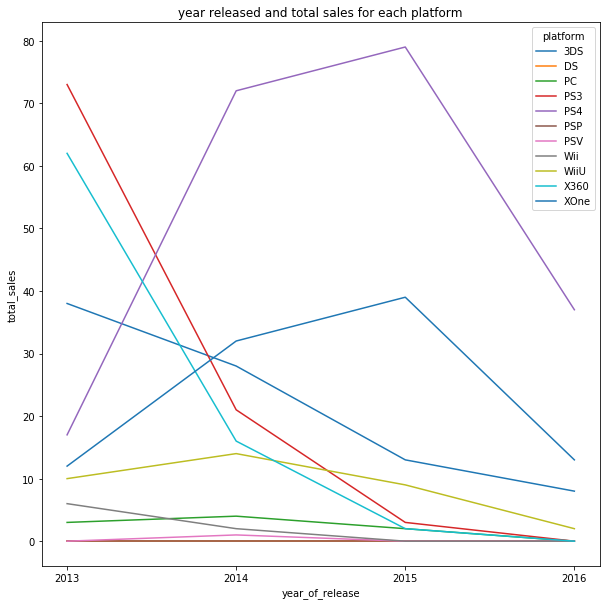

In [52]:
data1=new.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc=('sum'),fill_value=0)
#to draw lines for the platform totale sales per year
#xtick to x-axis field what we want id the yea and the year os the index
# y label what values in the y axis which is the total_sales 
# it will dow the column which is the pla`tform
ax = data1.plot(xticks=data1.index,figsize=(10,10))
ylab = ax.set_ylabel('total_sales')
ax.set_title('year released and total sales for each platform')

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,total_sales,jp_sales
platform,,,,,,,,
3DS,610329,17,14,67.81,0,4852.0,87,32
DS,16104,0,0,0.00,0,0.0,0,0
PC,386806,1,2,0.00,0,11482.0,9,0
PS3,694853,23,29,23.35,5,8494.0,97,0
PS4,789937,47,72,15.96,8,18167.0,205,0
PSP,136900,0,0,3.53,0,74.0,0,0
PSV,721229,0,0,18.59,0,5516.0,1,0
Wii,46316,3,1,0.05,0,0.0,8,0
WiiU,231624,10,5,10.88,0,5015.0,35,2


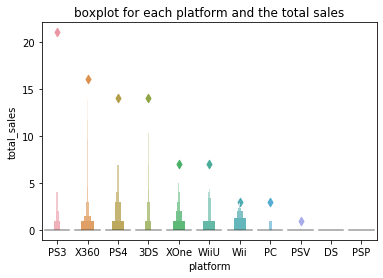

In [53]:
group=new.groupby(['platform']).agg('sum')
sns.boxenplot(y="total_sales", x="platform", data=new)
plt.title('boxplot for each platform and the total sales')

group

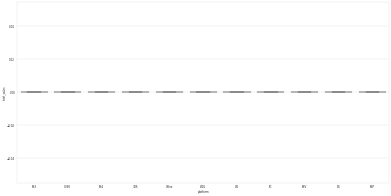

In [60]:
plt.figure(figsize = (24, 12), dpi = 20)
ax=sns.boxplot(x="platform", y="total_sales", data=new, showfliers = False)


In [53]:
df=pd.pivot_table(index='year_of_release',columns='platform',values='total_sales',aggfunc='sum',data=new,fill_value=0)
df

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2013,38,0,3,73,17,0,0,6,10,62,12
2014,28,0,4,21,72,0,1,2,14,16,32
2015,13,0,2,3,79,0,0,0,9,2,39
2016,8,0,0,0,37,0,0,0,2,0,13


In [54]:
dynamic=df-df.shift(+1,axis=0)
#.T ببدل الكولمز بالروز 
dynamic.T

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,NaN,-10.0,-15.0,-5.0
DS,NaN,0.0,0.0,0.0
PC,NaN,1.0,-2.0,-2.0
PS3,NaN,-52.0,-18.0,-3.0
PS4,NaN,55.0,7.0,-42.0
PSP,NaN,0.0,0.0,0.0
PSV,NaN,1.0,-1.0,0.0
Wii,NaN,-4.0,-2.0,0.0
WiiU,NaN,4.0,-5.0,-7.0


Text(0.5, 1, 'the profitable platforms')

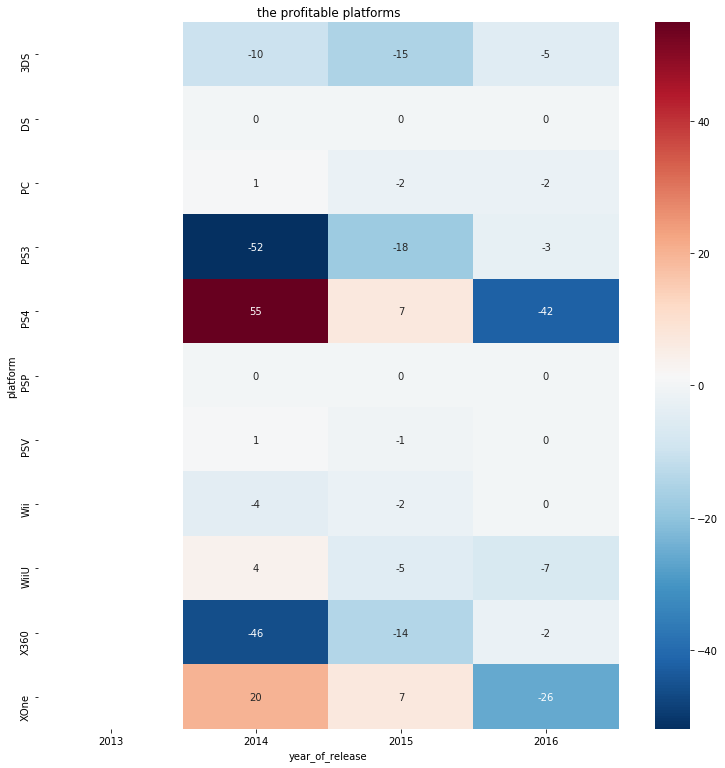

In [55]:
plt.figure(figsize=(13,13))
sns.heatmap(dynamic.T,cmap='RdBu_r',annot = True)
plt.title('the profitable platforms')

#بدنا مربح وموجود

Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions

let's take PS4 it's the only on that it still have sales by 2016

critic_score and its relation with the total_Sales 0.39 user_score and how it affect the total_sales -0.02 whats the correlation between the critic and user score 0.56


,critic_score,user_score,count,sum
0,19.0,3.4,1,0
1,25.0,1.9,1,0
2,31.0,4.5,1,0
3,32.0,1.5,1,0
4,38.0,2.9,1,0
...,...,...,...,...
226,92.0,8.6,1,2
227,92.0,9.2,1,3
228,93.0,7.9,1,5
229,93.0,8.2,1,3


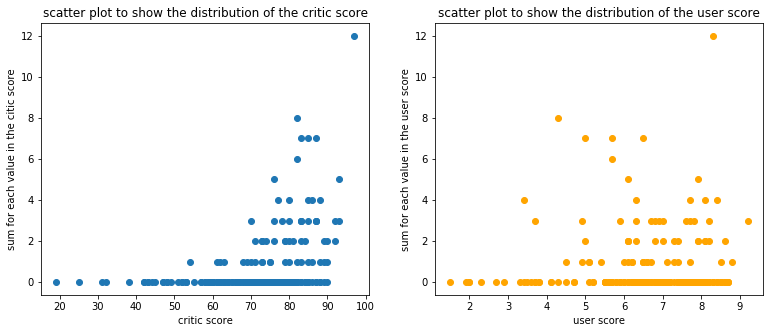

In [56]:
#null values with corr are by default excluded 
x=new[new['platform']=='PS4'].pivot_table(index=['critic_score','user_score'],values='total_sales',aggfunc={'sum','count'}).reset_index()
critic_score_corr=x['critic_score'].corr(x['sum'])
x['user_score']=x['user_score'].astype(float)
#print(x.T.tail(15).sample(n=7))
#print(x.T.head(10).sample(n=7))
relation=x['user_score'].corr(x['critic_score'])
user_score_corr=x['user_score'].corr(x['sum'])
print('critic_score and its relation with the total_Sales {:.2f}'.format(critic_score_corr),'user_score and how it affect the total_sales {:.2f}'.format(user_score_corr),'whats the correlation between the critic and user score {:.2f}'.format(relation))
f, axs = plt.subplots(2,2,figsize=(20,5))
plt.subplot(1,3,1)
plt.scatter(x['critic_score'],x['sum'])
plt.title('scatter plot to show the distribution of the critic score')
plt.xlabel('critic score')
plt.ylabel('sum for each value in the citic score')
plt.subplot(1,3,2)

plt.scatter(x['user_score'],x['sum'],c='orange')
plt.title('scatter plot to show the distribution of the user score')
plt.xlabel('user score')
plt.ylabel('sum for each value in the user score')

x


Text(0.5, 1, 'heatmap to see the correlation between user and critic score')

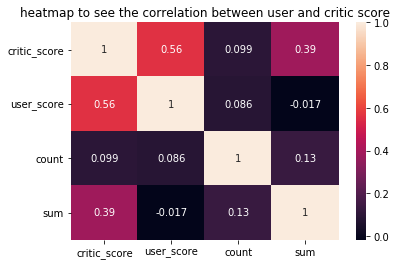

In [57]:
z=x.corr()
sns.heatmap(z,annot=True)
plt.title('heatmap to see the correlation between user and critic score')


Keeping your conclusions in mind, compare the sales of the same games on other platforms.

Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

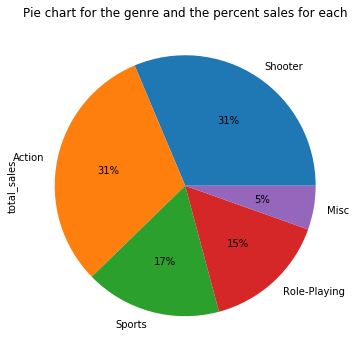

genre
Shooter         167
Action          165
Sports           90
Role-Playing     82
Misc             29
Platform         24
Racing           23
Fighting         19
Simulation       13
Adventure         3
Strategy          2
Puzzle            1
Name: total_sales, dtype: int64


In [58]:
genre = new.pivot_table(index="genre", aggfunc='sum')
genre.sort_values(by='total_sales',inplace=True,ascending=False)
pp=genre.copy().head(5)
pp.plot(kind='pie', y="total_sales",autopct='%1.0f%%', figsize=(7, 6), legend=False)
plt.title('Pie chart for the genre and the percent sales for each')
plt.show()
print(genre['total_sales'])


The shooter,action and sports are the top genres of games that have the highest sales while puzzle ,strategy,adventure the lowest sales

# Create a user profile for each region



For each region (NA, EU, JP), determine:




The top five platforms. Describe variations in their market shares from region to region.

top five platforms in NA region ['PS4', 'XOne', 'X360', 'PS3', '3DS'] top five platforms in EU region ['PS4', 'PS3', 'X360', 'XOne', '3DS'] top five platforms in JP region ['3DS', 'PS3', 'PSV', 'PS4', 'WiiU']


Text(0.5, 1.0, 'top 5 platforms and its sales in japan')

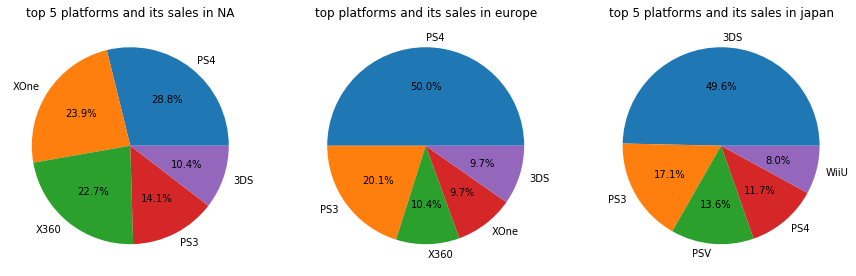

In [59]:
na=new.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)
eu=new.groupby('platform')['eu_sales'].sum().reset_index()
jp=new.groupby('platform')['jp_sales'].sum().reset_index()
meg=na.merge(eu,on='platform')
merg=meg.merge(jp,on='platform')
merg_na_top5=merg.sort_values(by='na_sales',ascending=False).head(5)
merg_eu_top5=merg.sort_values(by='eu_sales',ascending=False).head(5)
merg_jp_top5=merg.sort_values(by='jp_sales',ascending=False).head(5)
na_list_top5=list(merg_na_top5['platform'])
eu_list_top5=list(merg_eu_top5['platform'])
jp_list_top5=list(merg_jp_top5['platform'])
print('top five platforms in NA region',na_list_top5,'top five platforms in EU region',eu_list_top5,'top five platforms in JP region',jp_list_top5)

fig, ax=plt.subplots(1,3,figsize=(15,10))
plt.subplot(1,3,1)
plt.pie(merg_na_top5['na_sales'],labels=merg_na_top5['platform'],autopct='%1.1f%%')
plt.title('top 5 platforms and its sales in NA')


plt.subplot(1,3,2)

plt.pie(merg_eu_top5['eu_sales'],labels=merg_eu_top5['platform'],autopct='%1.1f%%')
plt.title('top platforms and its sales in europe')

plt.subplot(1,3,3)

plt.pie(merg_jp_top5['jp_sales'],labels=merg_jp_top5['platform'],autopct='%1.1f%%')
plt.title('top 5 platforms and its sales in japan')


The top five genres. Explain the difference.

top five genre in NA region ['Shooter', 'Action', 'Sports', 'Role-Playing', 'Misc'] top five genre in EU region ['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc'] top five genre in JP region ['Role-Playing', 'Action', 'Misc', 'Fighting', 'Shooter']


Text(0.5, 1.0, 'top 5 genre and its sales in japan')

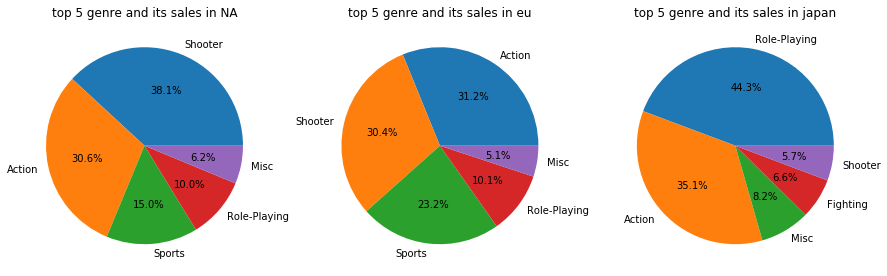

In [60]:
na=new.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)
eu=new.groupby('genre')['eu_sales'].sum().reset_index()
jp=new.groupby('genre')['jp_sales'].sum().reset_index()
meg=na.merge(eu,on='genre')
merg=meg.merge(jp,on='genre')
merg_na_top5=merg.sort_values(by='na_sales',ascending=False).head(5)
merg_eu_top5=merg.sort_values(by='eu_sales',ascending=False).head(5)
merg_jp_top5=merg.sort_values(by='jp_sales',ascending=False).head(5)
na_list_top5=list(merg_na_top5['genre'])
eu_list_top5=list(merg_eu_top5['genre'])
jp_list_top5=list(merg_jp_top5['genre'])
print('top five genre in NA region',na_list_top5,'top five genre in EU region',eu_list_top5,'top five genre in JP region',jp_list_top5)
fig, ax=plt.subplots(1,3,figsize=(15,10))
plt.subplot(1,3,1)
plt.pie(merg_na_top5['na_sales'],labels=merg_na_top5['genre'],autopct='%1.1f%%')
plt.title('top 5 genre and its sales in NA')

plt.subplot(1,3,2)

plt.pie(merg_eu_top5['eu_sales'],labels=merg_eu_top5['genre'],autopct='%1.1f%%')
plt.title('top 5 genre and its sales in eu')
plt.subplot(1,3,3)

plt.pie(merg_jp_top5['jp_sales'],labels=merg_jp_top5['genre'],autopct='%1.1f%%')
plt.title('top 5 genre and its sales in japan')

Do ESRB ratings affect sales in individual regions?

In [61]:
new['rating'].unique()

array(['M', 'unknown', 'E', 'T', 'E10+'], dtype=object)

In [62]:
nar=new.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)
nar

,rating,na_sales
2,M,82
4,unknown,41
0,E,31
3,T,14
1,E10+,9


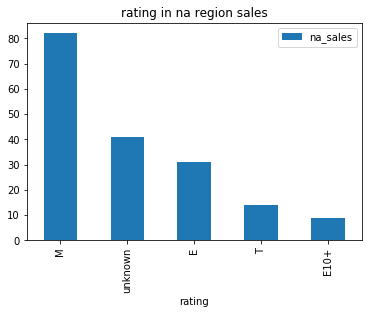

In [63]:
nar.plot(kind='bar',title='rating in na region sales',x='rating',y='na_sales')

In [64]:
eur=new.groupby('rating')['eu_sales'].sum().reset_index()
eur

,rating,eu_sales
0,E,40
1,E10+,2
2,M,68
3,T,8
4,unknown,34


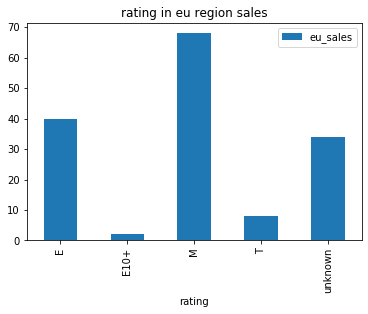

In [65]:
eur.plot(kind='bar',title='rating in eu region sales',x='rating',y='eu_sales')

In [66]:
jpr=new.groupby('rating')['jp_sales'].sum().reset_index()
jpr

,rating,jp_sales
0,E,15.14
1,E10+,5.89
2,M,14.11
3,T,20.59
4,unknown,85.29


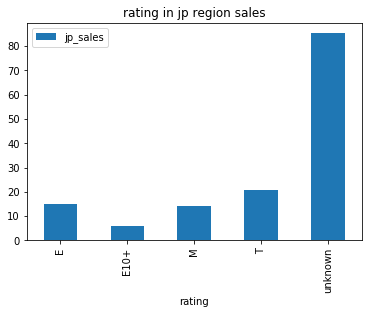

In [67]:
jpr.plot(kind='bar',title='rating in jp region sales',x='rating',y='jp_sales')

# Test the following hypotheses:



—Average user ratings of the Xbox One and PC platforms are the same.




**null hypothesis**

Average user ratings of the Xbox One and PC platforms are the same

**alternative hypothesis** 

Average user ratings of the Xbox One and PC platforms are not the same

In [68]:
new['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [69]:
new['user_score']=new['user_score'].replace(to_replace='tbd' , value=0)
new['user_score']=new['user_score'].astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [70]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             2237 non-null   object  
 1   platform         2237 non-null   object  
 2   year_of_release  2237 non-null   int64   
 3   genre            2237 non-null   category
 4   na_sales         2237 non-null   int64   
 5   eu_sales         2237 non-null   int64   
 6   jp_sales         2237 non-null   float64 
 7   other_sales      2237 non-null   int64   
 8   critic_score     994 non-null    float64 
 9   user_score       1239 non-null   float64 
 10  rating           2237 non-null   object  
 11  total_sales      2237 non-null   int64   
 12  jp_sales         2237 non-null   int64   
dtypes: category(1), float64(3), int64(6), object(3)
memory usage: 294.3+ KB


In [71]:
xbox=['X360','XOne','XB']
xboxx= new[new['platform'].isin(xbox)].dropna()['user_score'].values
pc = new[new["platform"] == 'PC'].dropna()['user_score'].values
alpha=0.5
result = stats.ttest_ind(pc, xboxx)
print('pvalue:', result.pvalue)

if (result.pvalue < alpha):
    print('alter hypothesis is true')
else:
    print('null hypothesis is true')
print('action genre mean {:.2f}'.format(pc.mean()),'sport genre mean {:.2f}'.format(xboxx.mean()))


pvalue: 0.3297533551892461
alter hypothesis is true
action genre mean 6.31 sport genre mean 6.47


—Average user ratings for the Action and Sports genres are different.


In [72]:
new['genre'].unique()

['Action', 'Shooter', 'Role-Playing', 'Misc', 'Sports', ..., 'Simulation', 'Platform', 'Strategy', 'Adventure', 'Puzzle']
Length: 12
Categories (12, object): ['Action', 'Adventure', 'Fighting', 'Misc', ..., 'Shooter', 'Simulation', 'Sports', 'Strategy']

In [73]:

action= new[new['genre']=='Action'].dropna()['user_score'].values
sport = new[new["genre"] == 'Sports'].dropna()['user_score'].values
alpha=0.5
result = stats.ttest_ind(sport, action)
print('pvalue:', result.pvalue)

if (result.pvalue < alpha):
    print('alter hypothesis is true')
else:
    print('null hypothesis is true')
print('action genre mean {:.2f}'.format(action.mean()),'sport genre mean {:.2f}'.format(sport.mean()))


pvalue: 2.004746987047262e-15
alter hypothesis is true
action genre mean 6.91 sport genre mean 5.68


i used Two-sample T-test
Such a test tells us whether two data samples have different means. Here, we take the null hypothesis that both groups have equal means. 


# conclusion

After studying the data for the online store Ice, which sells video games all over the world. we can identify patterns that determine whether a game succeeds or not. 
we have found out that 
* al lot of platforms have been released in 80's and 90's but they dropped there sales after 10 years of releasing the peak for each platform is from 3-4 year and each platform doesn't make a sales at the moment of releasing but after two-3 years 

* platforms before 2013 outdated by year 2016 have no sales

**Top 3 platforms that will affect the sales in 2017**

     it depends on the region: 
     NA: People buy the PS4 , XONE,X360
     EU: People buy the PS4 , PS3 ,X360
     JP: People buy the 3DS , PS3 ,PSV
     
but taking in perspection to the year of release we notice that PS3 OUT OF DATE however XONE almost out of date thus the PS4 maybe it will still be profitable platform

**Top 3 genre that will affect the sales in 2017**

     it depends on the region: 
     
     For NA and EU shooter sport and action takes the first three places **but** in Japan role playing,shooter and misk genre of games so we noticed the japanese do not like the sport and action games good to know that.

**Rating**

    Games with no rating in japan has the highest sales but in europe and north america the M rating take it 
    

* critic and user score do have positive correlation for aroung 0.5



